In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget, remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [2]:
# load the data for the shift analysis
attr_sc_z_images = []
for i in np.arange(0,100,5):
    attr_sc_z_images.append(load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z%d/frame_0_*.npy" %i))
attr_sc_z_images = np.swapaxes(attr_sc_z_images,0,1) 
attr_ni_z_images = load_img_files("/data/new_trap/ImageAnalysis/20200905/z/z*")

/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z0/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z0/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z0/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z5/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z5/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z5/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z10/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z10/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z10/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z15/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z15/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z15/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z20/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z20/

In [3]:
# load the calibration data for tests 
attr_ni_cal_z_images = load_img_files("/data/new_trap/ImageAnalysis/20200905/displacement_z/*")

/data/new_trap/ImageAnalysis/20200905/displacement_z/0.bmp 0
/data/new_trap/ImageAnalysis/20200905/displacement_z/1nm.bmp 1
/data/new_trap/ImageAnalysis/20200905/displacement_z/7nm.bmp 2
/data/new_trap/ImageAnalysis/20200905/displacement_z/10nm.bmp 3
/data/new_trap/ImageAnalysis/20200905/displacement_z/27nm.bmp 4
/data/new_trap/ImageAnalysis/20200905/displacement_z/10nm_2.bmp 5
/data/new_trap/ImageAnalysis/20200905/displacement_z/550nm.bmp 6


In [4]:
def two_d_shift_analysis(zeroth_image,images,y_low=1024,y_up=0,x_low=0,x_up=1280,upsample_factor=100,print_results=False):
    displace1 = []
    displace2 = []
    for offset_image in images:
        #print(np.shape(offset_image),np.shape(zeroth_image))
        image=zeroth_image
        shift, error, diffphase = phase_cross_correlation(image, offset_image[y_up:y_low,x_low:x_up],
                                                          upsample_factor=upsample_factor)

        if(print_results==True):print(shift)
    
        displace1.append(shift[0])
        displace2.append(shift[1])
    return displace1,displace2

In [5]:
y_low=680
y_up=0
attr_z_ni_displacement = two_d_shift_analysis(attr_ni_z_images[0][y_up:y_low,0:1280],images=attr_ni_z_images,y_low=y_low,y_up=y_up,x_low=0,x_up=1280,upsample_factor=100,print_results=True)

[0. 0.]
[ 9.39 -0.23]
[19.25 -0.11]
[2.906e+01 1.000e-02]
[ 3.887e+01 -2.000e-02]
[4.862e+01 2.000e-02]
[ 5.84e+01 -1.00e-02]
[68.17 -0.14]
[77.92  0.09]
[87.72 -0.11]
[ 9.748e+01 -2.000e-02]
[ 1.0721e+02 -5.0000e-02]
[ 1.1698e+02 -7.0000e-02]
[1.2683e+02 4.0000e-02]
[1.3652e+02 5.0000e-02]
[ 1.4631e+02 -8.0000e-02]
[1.5606e+02 3.0000e-02]
[1.6582e+02 4.0000e-02]
[ 1.7552e+02 -3.0000e-02]
[1.8531e+02 5.0000e-02]
[1.9497e+02 1.1000e-01]


------------------------------------------------------------------
| FCN = 0.1089                  |      Ncalls=40 (40 total)      |
| EDM = 1.48E-21 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5120961091336478 -0.18982683982324033


/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':


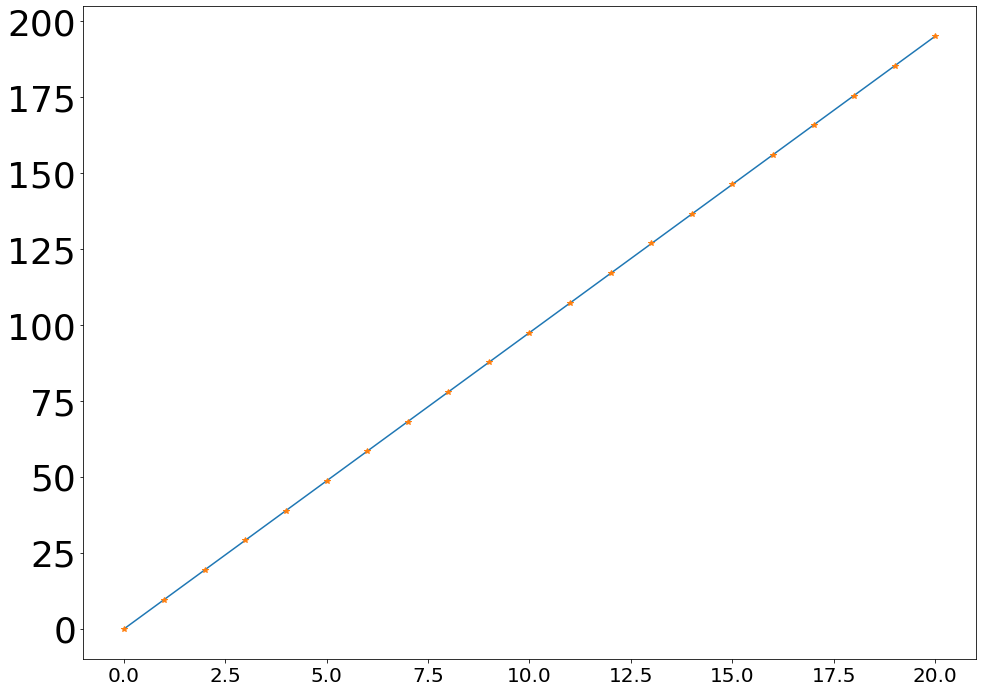

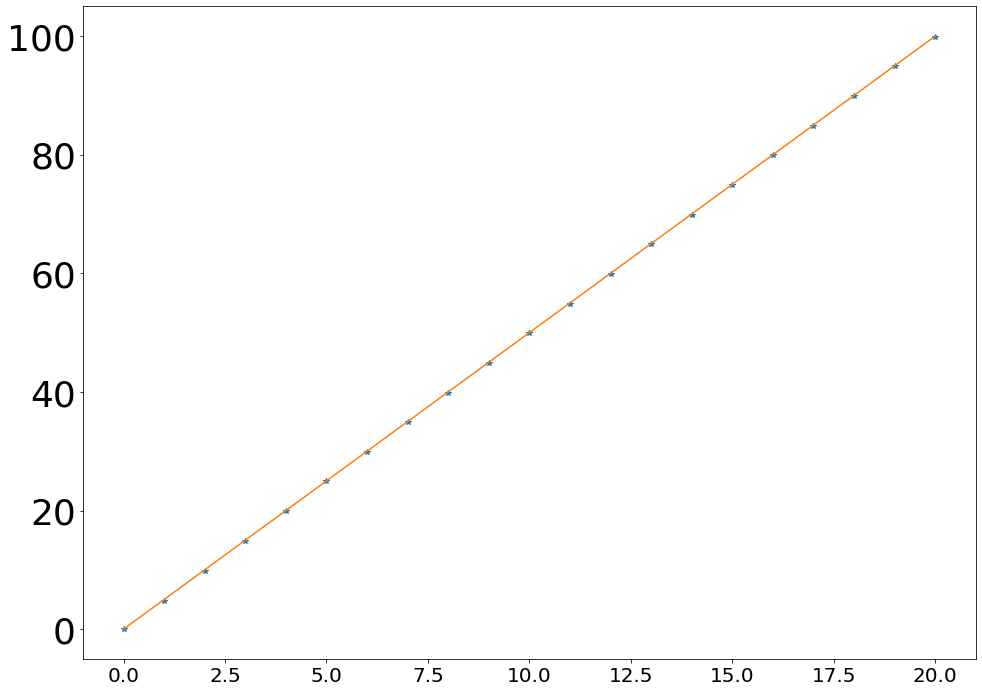

In [6]:
data_y=attr_z_ni_displacement[0]
data_x=np.arange(0,len(data_y),1)
data_y_error=1

def chisquare_linear(a,b):
    return chisquare_1d(function=linear,functionparams=[a,b],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

m2=Minuit(chisquare_linear, 
     a = 100,
     b=0,
     errordef = 1,
     print_level=1)

m2.migrad()

print(5/m2.values["a"],m2.values["b"])
cal_factor_z_side1_pixel_size = 5/m2.values["a"]
plt.plot(data_x,m2.values["a"]*data_x+m2.values["b"])
plt.plot(attr_z_ni_displacement[0],linestyle="",marker="*")
plt.show()

#plt.plot(z_displacement,linestyle="",marker="*")
plt.plot(data_x,np.multiply(attr_z_ni_displacement[0],cal_factor_z_side1_pixel_size),linestyle="",marker="*")
plt.plot(np.arange(0,105,5))
plt.show()

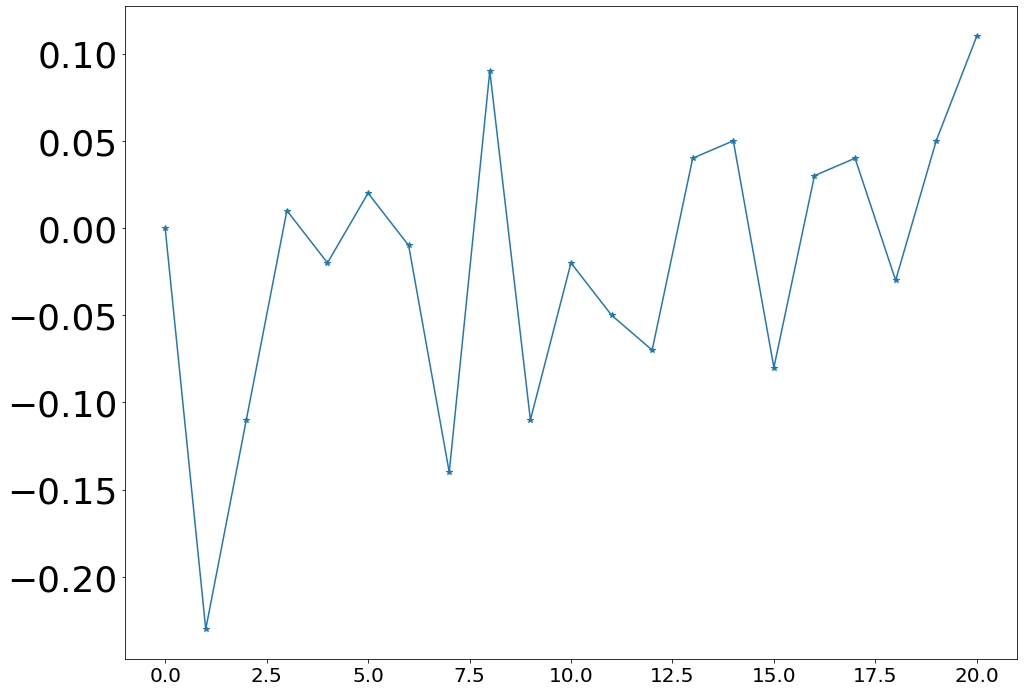

In [7]:
plt.plot(attr_z_ni_displacement[1],marker="*")

In [8]:
y_low=650
y_up=500
x_low=10
x_up=1000

attr_z_ni_calibration = two_d_shift_analysis(attr_ni_cal_z_images[0][y_up:y_low,x_low:x_up],images=attr_ni_cal_z_images,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=10000,print_results=True)


[0. 0.]
[0.0001 0.0111]
[ 0.0147 -0.006 ]
[-0.0021 -0.0183]
[ 0.0295 -0.0097]
[ 0.0109 -0.022 ]
[ 0.4614 -0.0109]


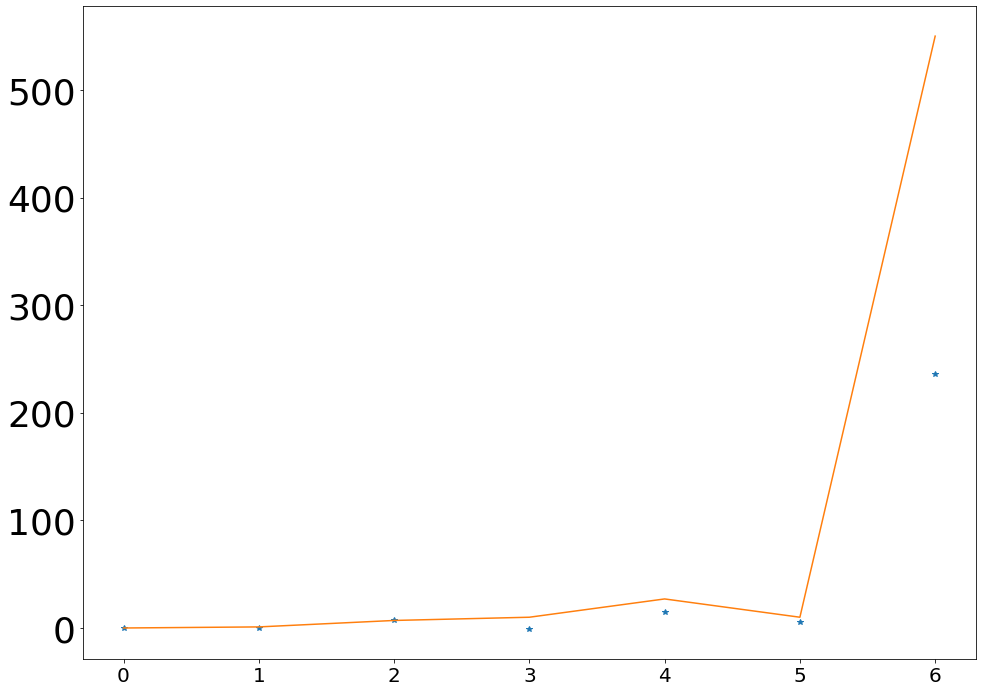

In [9]:
meas_z_cal = np.arange(0,len(attr_z_ni_calibration[0]),1)
true_vals_z_cal = [0,1,7,10,27,10,550]
plt.plot(meas_z_cal,np.multiply(attr_z_ni_calibration[0],cal_factor_z_side1_pixel_size*1000),linestyle="",marker="*")
plt.plot(meas_z_cal,true_vals_z_cal)
#plt.yscale("log")

[0. 0.]
[ 5.07 -0.11]
[12.35 -0.15]
[19.46 -0.13]
[26.51 -0.07]
[33.56 -0.1 ]
[40.59 -0.26]
[ 4.769e+01 -1.000e-02]
[54.61 -0.17]
[61.65 -0.12]
[68.66 -0.1 ]
[-74.35  -0.09]
[-67.21  -0.08]
[-60.19  -0.12]
[-53.13  -0.21]
[-46.4   -0.27]
[-39.12  -0.04]
[-32.29  -0.12]
[-25.1   -0.12]
[ 0.21 -0.04]


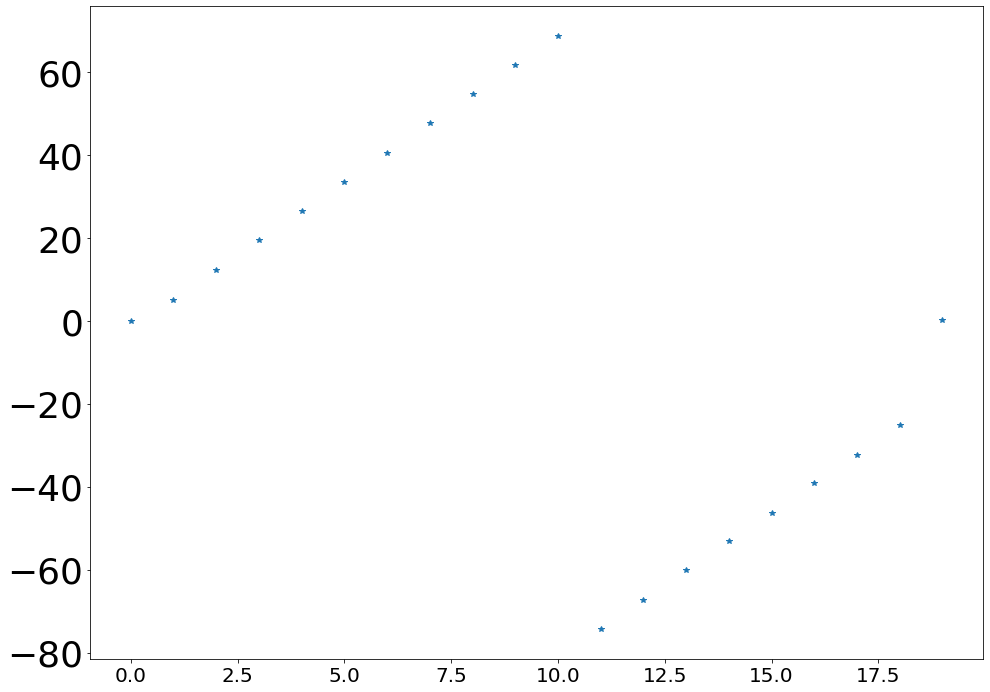

In [10]:
y_up = 250
y_low = 400
x_up=640
x_low=0
attr_z_side2_img = attr_sc_z_images[2]
attr_z_side2_displacement = two_d_shift_analysis(attr_z_side2_img[0][y_up:y_low][x_low:x_up],images=attr_z_side2_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_z_side2_displacement[0],marker="*",linestyle="")
#plt.plot(np.arange(0,100,5))

[0. 0.]
[0.01 0.01]
[0.   0.01]
[0.   0.03]
[0.03 0.03]
[0.03 0.03]
[0.03 0.05]
[0.05 0.05]
[0.04 0.06]
[0.06 0.07]
[0.05 0.06]
[0.06 0.07]
[0.08 0.08]
[0.08 0.07]
[0.09 0.08]
[0.11 0.09]
[0.11 0.1 ]
[0.12 0.08]
[0.12 0.1 ]
[0.12 0.11]


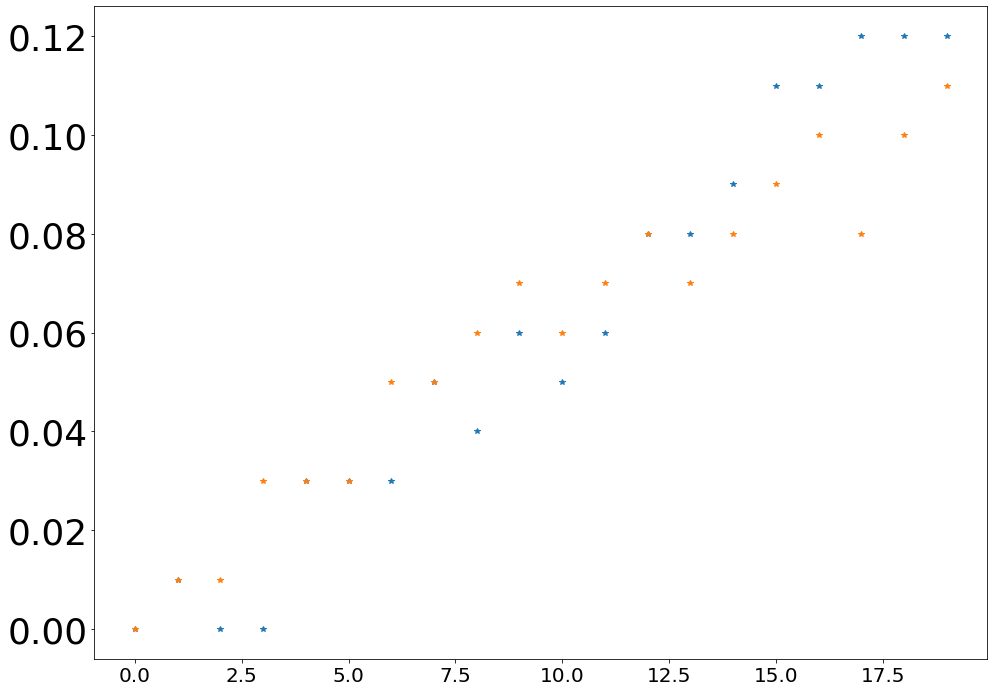

In [11]:
y_up = 0
y_low = 300
x_up=500
x_low=0
attr_z_top_img = attr_sc_z_images[1]
attr_z_top_displacement = two_d_shift_analysis(attr_z_top_img[0][y_up:y_low,x_low:x_up],images=attr_z_top_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_z_top_displacement[0],marker="*",linestyle="")
plt.plot(attr_z_top_displacement[1],marker="*",linestyle="")

[0. 0.]
[ 0.   -0.03]
[ 0.   -0.05]
[ 0.   -0.08]
[-0.02 -0.12]
[-0.01 -0.13]
[-0.01 -0.14]
[ 0.01 -0.18]
[ 0.01 -0.21]
[ 0.02 -0.22]
[ 0.02 -0.24]
[ 0.02 -0.27]
[ 0.02 -0.28]
[ 0.03 -0.3 ]
[ 0.03 -0.32]
[ 0.05 -0.32]
[ 0.05 -0.35]
[ 0.07 -0.33]
[ 0.05 -0.34]
[ 0.06 -0.39]


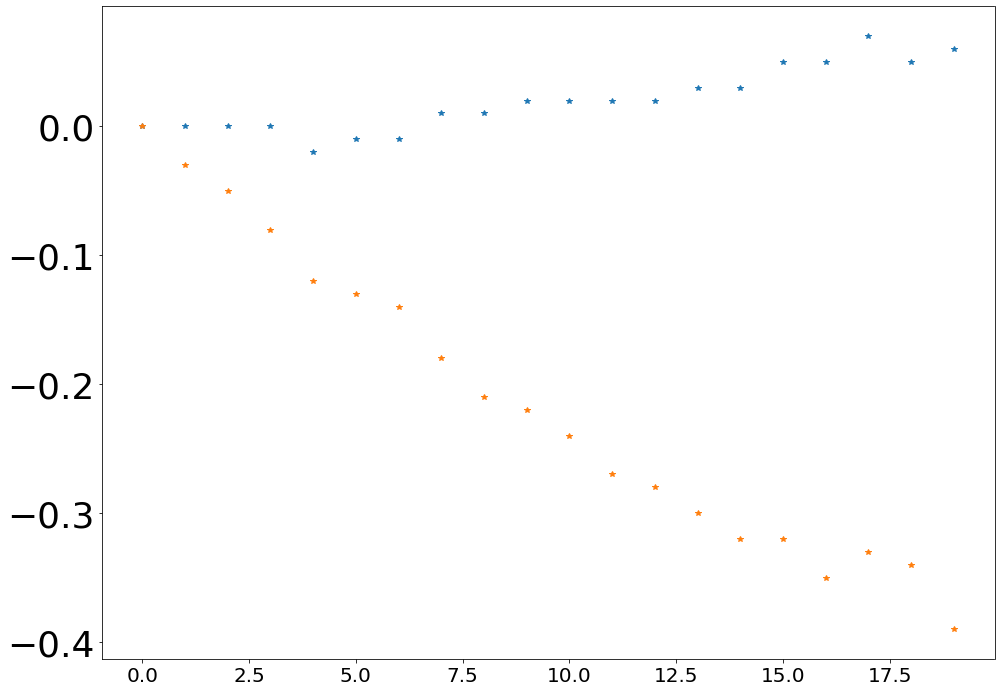

In [13]:
y_up = 150
y_low = 300
x_up=500
x_low=150
attr_z_top_zoom_img = attr_sc_z_images[0]
attr_z_top_zoom_displacement = two_d_shift_analysis(attr_z_top_zoom_img[0][y_up:y_low,x_low:x_up],images=attr_z_top_zoom_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_z_top_zoom_displacement[0],marker="*",linestyle="")
plt.plot(attr_z_top_zoom_displacement[1],marker="*",linestyle="")

In [24]:
# load the data for the shift analysis
attr_sc_y_images = []
true_y_displacements = [0,25,50,75,100,125,150,175,184,186,190,200,225,275,300,350,367,400,450,475,500]
 
for i in true_y_displacements:
    attr_sc_y_images.append(load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y%d/frame_0_*.npy" %i))
print(np.shape(attr_sc_y_images))    
attr_sc_y_images = np.swapaxes(attr_sc_y_images,0,1)     
attr_ni_y_images= load_img_files("/data/new_trap/ImageAnalysis/20200905/y/y*")

/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y0/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y0/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y0/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y25/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y25/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y25/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y50/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y50/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y50/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y75/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y75/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y75/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y100/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/

In [15]:
# load the calibration data for tests 
attr_ni_cal_y_images = load_img_files("/data/new_trap/ImageAnalysis/20200905/displacement_y/*")

/data/new_trap/ImageAnalysis/20200905/displacement_y/0.bmp 0
/data/new_trap/ImageAnalysis/20200905/displacement_y/p4_nm.bmp 1
/data/new_trap/ImageAnalysis/20200905/displacement_y/p8_nm.bmp 2
/data/new_trap/ImageAnalysis/20200905/displacement_y/p10_nm.bmp 3
/data/new_trap/ImageAnalysis/20200905/displacement_y/p15_nm.bmp 4
/data/new_trap/ImageAnalysis/20200905/displacement_y/p26_nm.bmp 5
/data/new_trap/ImageAnalysis/20200905/displacement_y/m41_nm.bmp 6
/data/new_trap/ImageAnalysis/20200905/displacement_y/p60_nm.bmp 7


[0. 0.]
[ 0.76 34.61]
[ 2.32 48.24]
[ 3.84 62.08]
[ 5.17 82.75]
[ 6.6  93.13]
[ 7.96 95.59]
[ 9.3  90.32]
[ 9.89 93.25]
[ 9.95 95.74]
[10.2  93.45]
[ 10.79 111.47]
[ 12.2  120.65]
[ 15.04 152.65]
[ 16.45 173.19]
[ 19.11 196.5 ]
[ 19.98 208.12]
[ 21.77 240.08]
[  0.11 100.93]
[6.000e-02 6.622e+01]
[ 0.   -0.01]


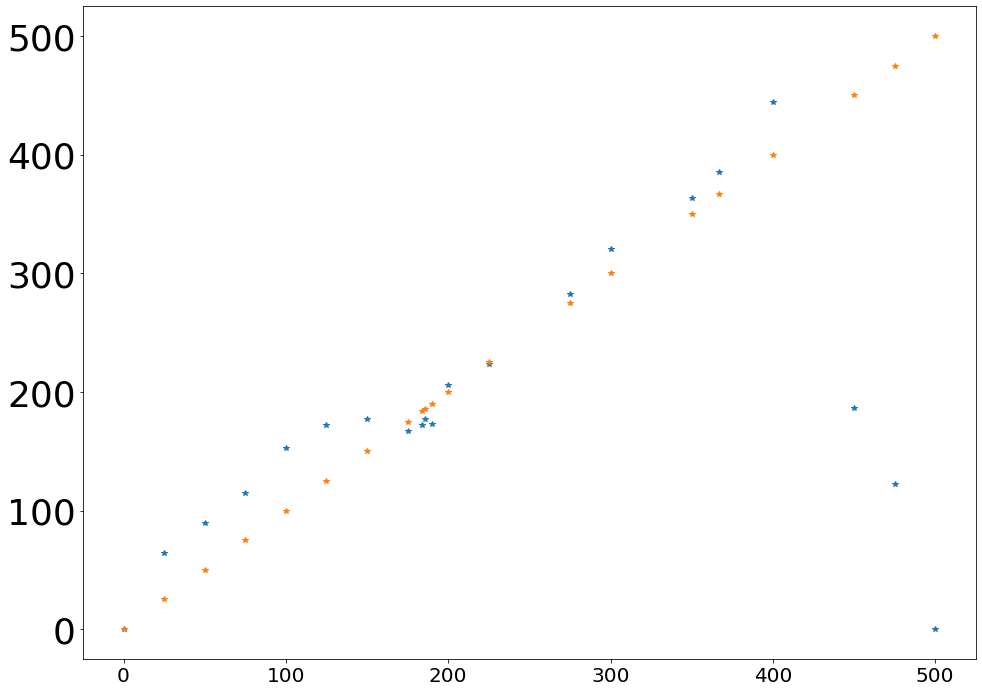

In [17]:
y_low=700
y_up=500
attr_y_ni_displacement = two_d_shift_analysis(attr_ni_y_images[0][y_up:y_low][0:1280],images=attr_ni_y_images,y_low=y_low,y_up=y_up,x_low=0,x_up=1280,upsample_factor=100,print_results=True)

plt.plot(true_y_displacements,np.multiply(attr_y_ni_displacement[1],1.85),linestyle="",marker="*")
plt.plot(true_y_displacements,true_y_displacements,linestyle="",marker="*")
plt.show()

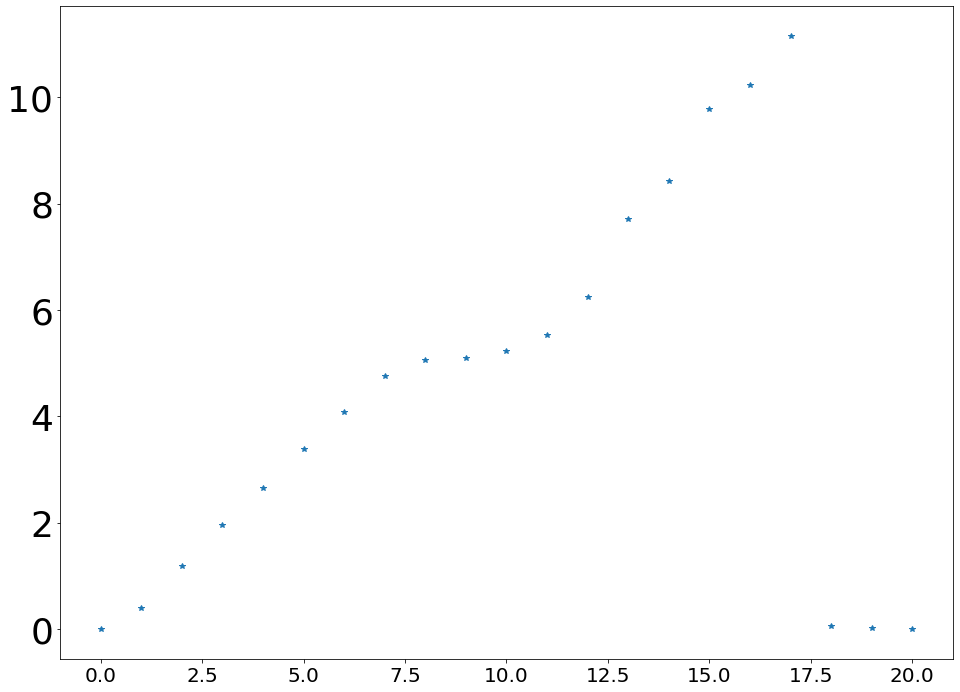

In [18]:
plt.plot(np.multiply(attr_y_ni_displacement[0],cal_factor_z_side1_pixel_size),linestyle="",marker="*")


In [19]:
# load the calibration data for tests 
true_values_y_cal = [0,4,8,10,15,26,-41,60]

y_low=700
y_up=500
x_low=0
x_up=1280

attr_y_ni_calibration = two_d_shift_analysis(attr_ni_cal_y_images[0][y_up:y_low][x_low:x_up],images=attr_ni_cal_y_images,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=10000,print_results=True)


[0. 0.]
[-0.0034 -0.0056]
[0.0014 0.0044]
[0.0105 0.006 ]
[ 0.0123 -0.0058]
[0.0008 0.0001]
[ 0.0066 -0.023 ]
[0.0143 0.0027]


[0. 0.]
[ 0.35 -0.02]
[1.94 0.04]
[2.61 0.02]
[3.62 0.01]
[4.59 0.05]
[5.59 0.11]
[ 6.62 -0.04]
[6.85 0.  ]
[ 6.97 -0.06]
[ 7.15 -0.1 ]
[7.66 0.11]
[8.64 0.17]
[1.05e+01 1.00e-02]
[11.44  0.15]
[13.12 -0.05]
[0.13 0.  ]
[0.09 0.  ]
[ 0.04 -0.04]
[ 0.03 -0.04]
[ 0.05 -0.01]


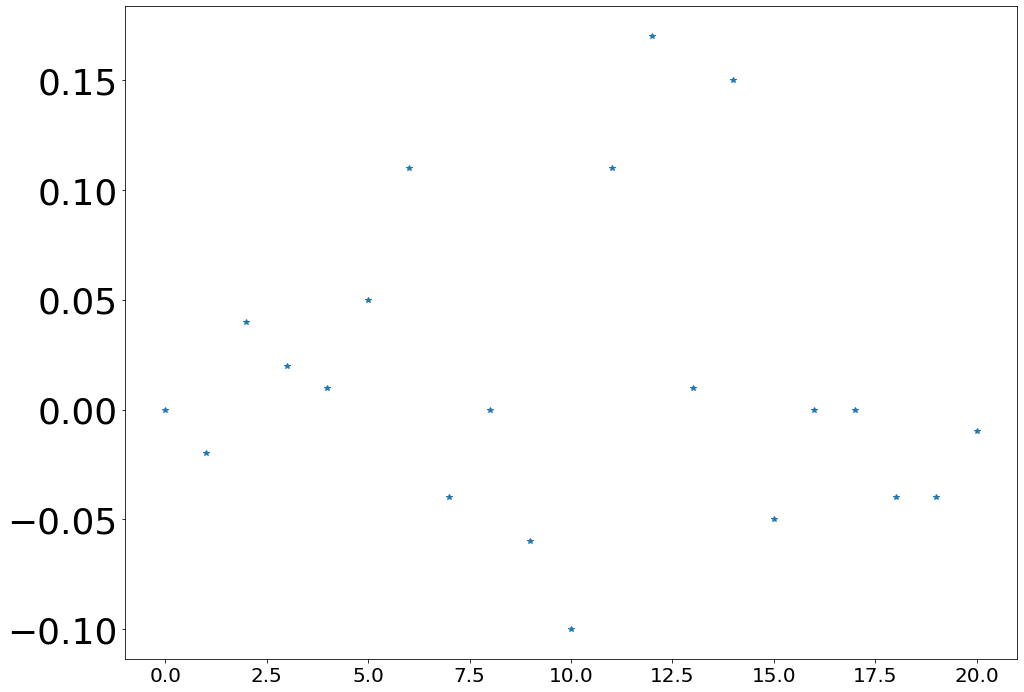

In [20]:
y_up = 300
y_low = 380
x_up=640
x_low=0
attr_y_side2_img = attr_sc_y_images[2]
attr_y_side2_displacement = two_d_shift_analysis(attr_y_side2_img[0][y_up:y_low][x_low:x_up],images=attr_y_side2_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_y_side2_displacement[1],marker="*",linestyle="")
#plt.plot(np.arange(0,100,5))

[0. 0.]
[-0.11 -7.39]
[-0.15 -8.12]
[-0.28 -8.25]
[ -0.4  -15.82]
[-0.19 -8.43]
[ -0.34 -16.  ]
[ -0.3 -16.1]
[ -0.19 -11.46]
[ -0.16 -12.1 ]
[ -0.17 -12.98]
[ -0.21 -16.11]
[ -0.11 -16.36]
[  0.  -16.3]
[  0.1 -16.5]
[  0.07 -24.89]
[  0.07 -29.39]
[  0.07 -31.52]
[  0.16 -32.13]
[  0.16 -38.28]
[  0.18 -40.01]


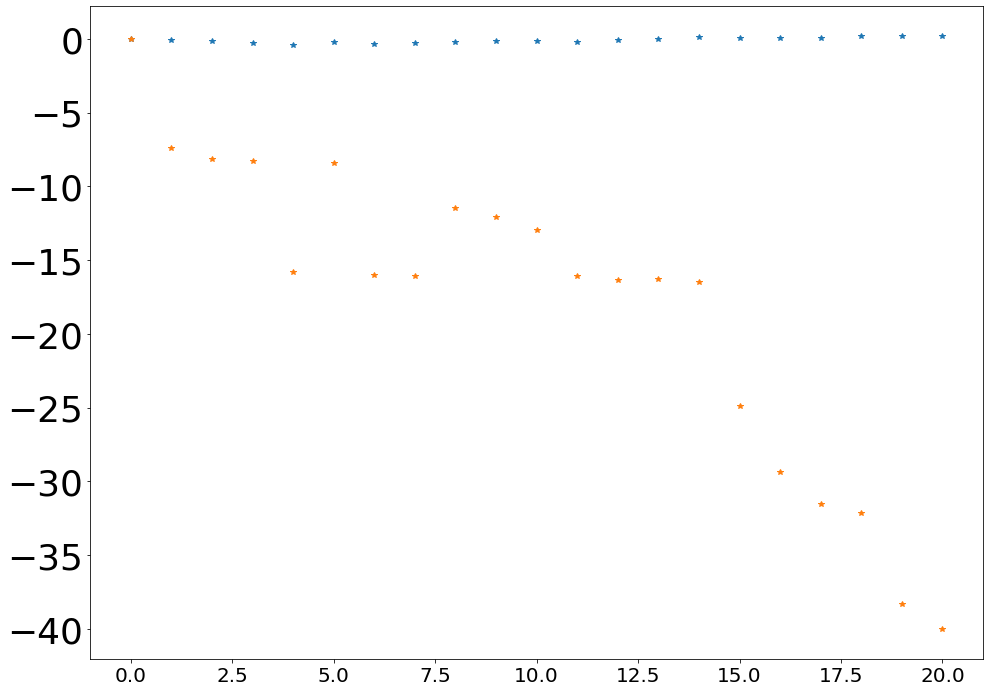

In [21]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_y_top_img = attr_sc_y_images[1]
attr_y_top_displacement = two_d_shift_analysis(attr_y_top_img[0][y_up:y_low,x_low:x_up],images=attr_y_top_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_y_top_displacement[0],marker="*",linestyle="")
plt.plot(attr_y_top_displacement[1],marker="*",linestyle="")

[0. 0.]
[-0.03 12.5 ]
[-0.06 25.46]
[-0.07 38.27]
[-0.1 51.2]
[-0.1  64.22]
[-0.12 77.56]
[-0.13 90.62]
[-0.11 95.56]
[-0.13 96.36]
[-0.11 98.45]
[ -0.14 103.66]
[ -0.13 116.67]
[-1.4000e-01  1.4335e+02]
[-1.3000e-01  1.4984e+02]
[-1.4000e-01  1.7257e+02]
[-1.4000e-01  1.8061e+02]
[-1.6000e-01  1.9764e+02]
[-2.0000e-01  2.2366e+02]
[ -0.24 236.8 ]
[-2.4000e-01  2.4879e+02]


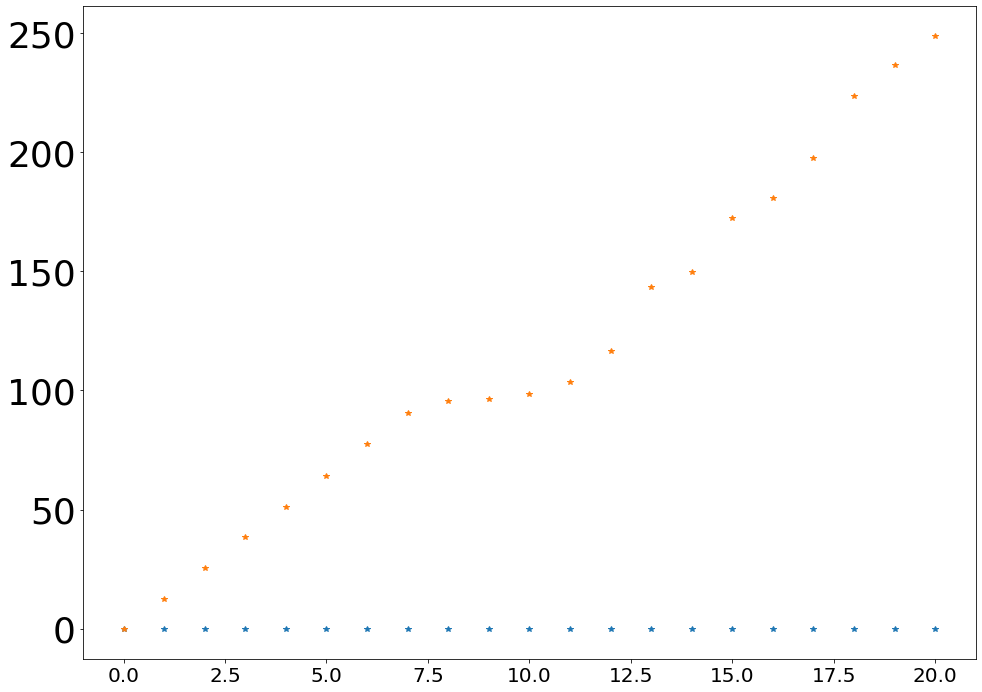

In [22]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_y_top_zoom_img = attr_sc_y_images[0]
attr_y_top_zoom_displacement = two_d_shift_analysis(attr_y_top_zoom_img[0][y_up:y_low,x_low:x_up],images=attr_y_top_zoom_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_y_top_zoom_displacement[0],marker="*",linestyle="")
plt.plot(attr_y_top_zoom_displacement[1],marker="*",linestyle="")

In [36]:
# load the data for the shift analysis
attr_sc_x_images = []
true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,"330_5","333_05"]
for i in true_x_displacements:
    #print("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x%s/frame_0_*.npy" %str(i))
    t = load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x%s/frame_0_*.npy" %str(i))
    #print(np.shape(t))
    attr_sc_x_images.append(t)
#print(np.shape(attr_sc_x_images))
attr_sc_x_images = np.swapaxes(attr_sc_x_images,0,1)     
attr_ni_x_images= load_img_files("/data/new_trap/ImageAnalysis/20200905/x/x*")



/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x0/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x0/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x0/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x75/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x75/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x75/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x150/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x150/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x150/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x200/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x200/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x200/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x325/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200

In [37]:
y_low=1024
y_up=0
attr_x_ni_displacement = two_d_shift_analysis(attr_ni_x_images[0][y_up:y_low][0:1280],images=attr_ni_x_images,y_low=y_low,y_up=y_up,x_low=0,x_up=1280,upsample_factor=100,print_results=True)

[0. 0.]
[0.01 0.01]
[0.25 0.01]
[0.35 0.  ]
[2.25 0.04]
[ 2.33 -0.04]
[2.4  0.02]
[2.44 0.02]
[2.49 0.  ]
[2.51 0.03]
[ 2.29 -0.01]
[2.39 0.  ]
[2.45 0.01]
[2.5  0.09]


ValueError: x and y must have same first dimension, but have shapes (13,) and (14,)

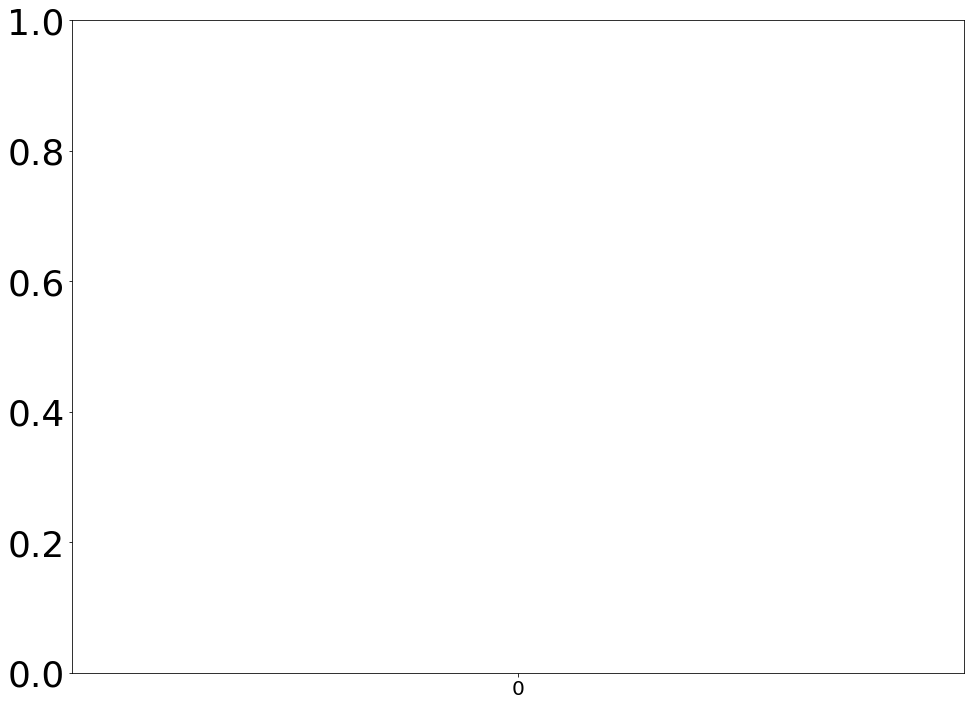

In [38]:
plt.plot(true_x_displacements,np.multiply(attr_x_ni_displacement[0],cal_factor_z_side1_pixel_size),linestyle="",marker="*")
plt.plot(true_x_displacements,np.multiply(attr_x_ni_displacement[0],1),linestyle="",marker="*")
#plt.plot(true_x_displacements,true_x_displacements,linestyle="",marker="*")
plt.show()

[0. 0.]
[-0.01 -0.02]
[0.12 0.  ]
[ 0.17 -0.01]
[0.18 0.  ]
[0.18 0.  ]
[ 0.2  -0.02]
[ 0.2  -0.01]
[0.22 0.  ]
[ 0.23 -0.01]
[ 0.2  -0.01]
[ 0.21 -0.02]
[0.22 0.01]


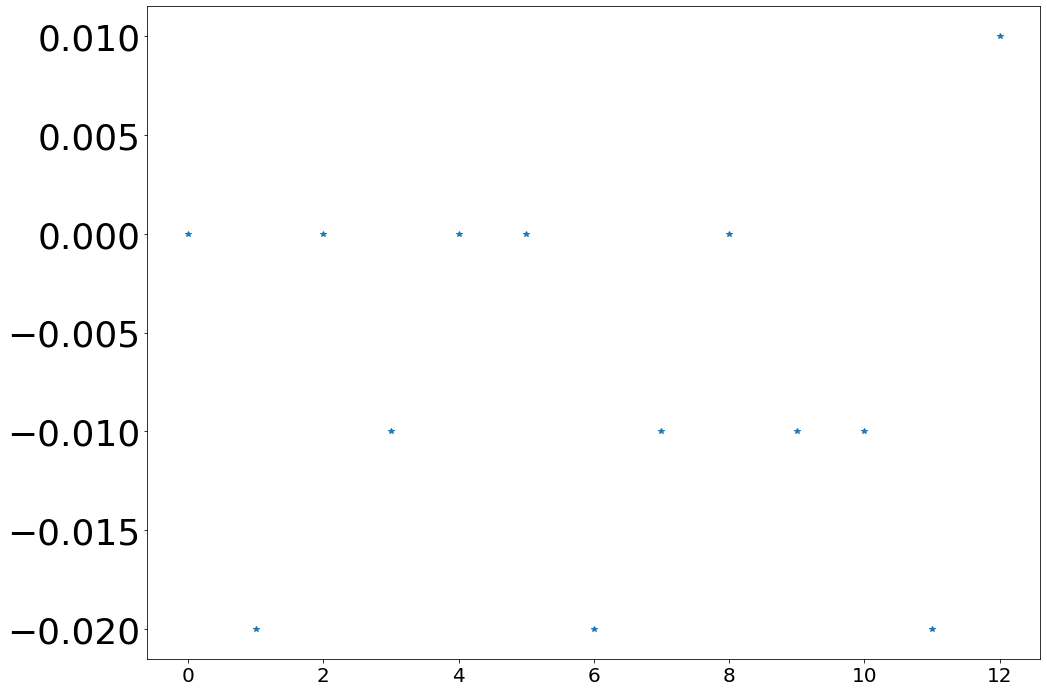

In [39]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_x_side2_img = attr_sc_x_images[2]
attr_x_side2_displacement = two_d_shift_analysis(attr_x_side2_img[0][y_up:y_low][x_low:x_up],images=attr_x_side2_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_x_side2_displacement[1],marker="*",linestyle="")
#plt.plot(np.arange(0,100,5))

[0. 0.]
[-2.59 -0.09]
[-4.58 -0.32]
[-4.65 -0.36]
[-4.47 -0.32]
[-4.51 -0.36]
[-4.52 -0.37]
[-4.5  -0.39]
[-4.52 -0.36]
[-4.49 -0.3 ]
[-4.31 -0.32]
[-4.49 -0.32]
[-4.52 -0.31]


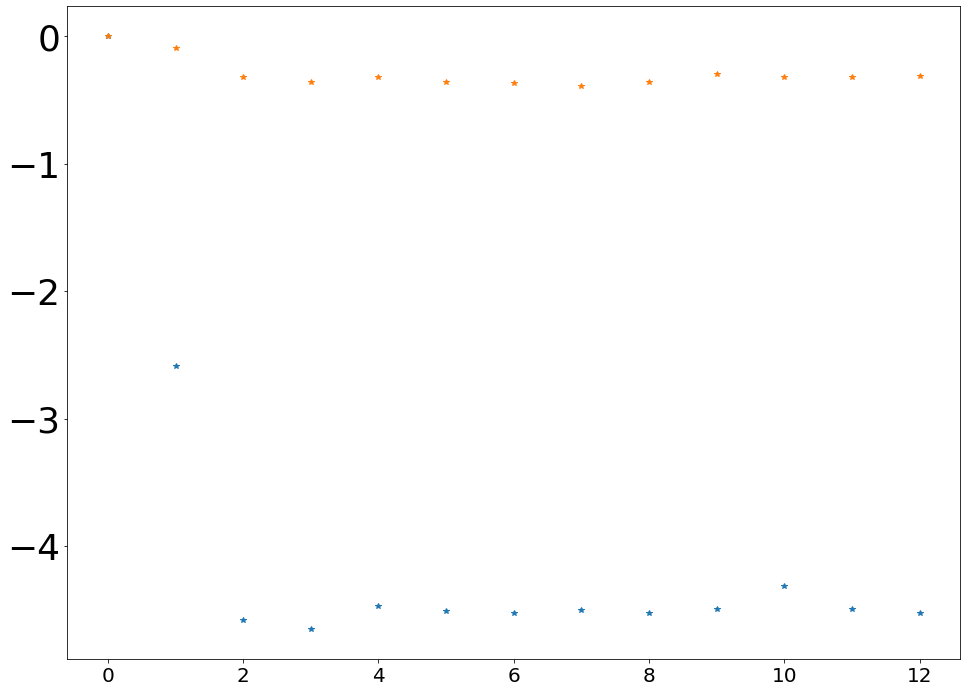

In [40]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_x_top_img = attr_sc_x_images[1]
attr_x_top_displacement = two_d_shift_analysis(attr_x_top_img[0][y_up:y_low,x_low:x_up],images=attr_x_top_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_x_top_displacement[0],marker="*",linestyle="")
plt.plot(attr_x_top_displacement[1],marker="*",linestyle="")

[4.5  0.39]
[2.58 0.36]
[2.47 0.4 ]
[2.41 0.31]
[0.2  0.01]
[0.13 0.01]
[0.05 0.01]
[0. 0.]
[-0.1  0. ]
[-0.14 -0.01]
[-2.47 -0.17]
[-0.03  0.  ]
[-0.15 -0.01]


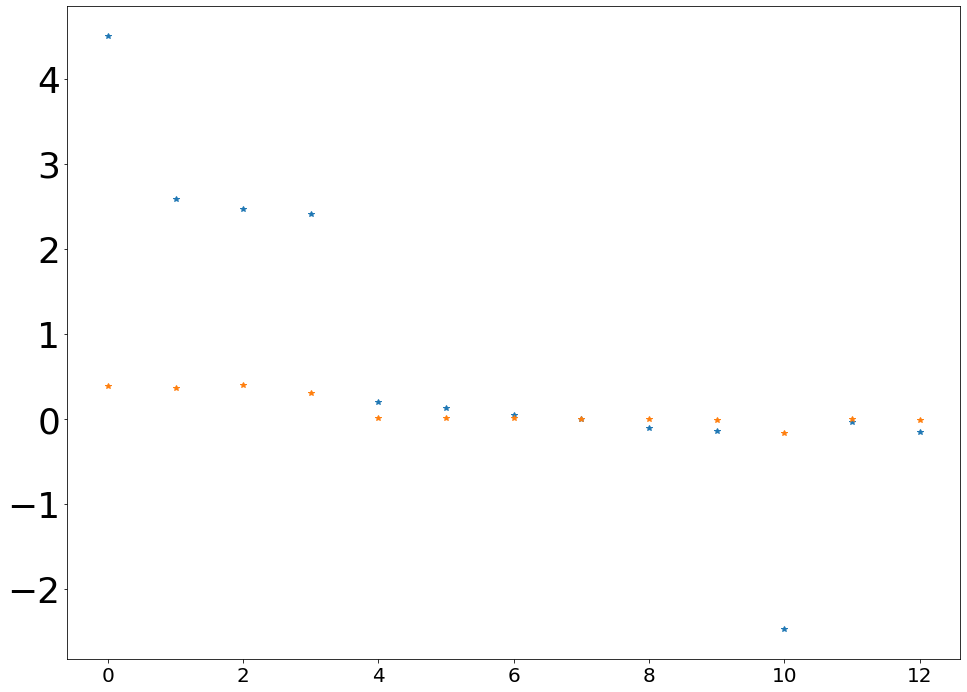

In [53]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_x_top_zoom_img = attr_sc_x_images[1]
attr_x_top_zoom_displacement = two_d_shift_analysis(attr_x_top_zoom_img[7][y_up:y_low,x_low:x_up],images=attr_x_top_zoom_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_x_top_zoom_displacement[0],marker="*",linestyle="")
plt.plot(attr_x_top_zoom_displacement[1],marker="*",linestyle="")

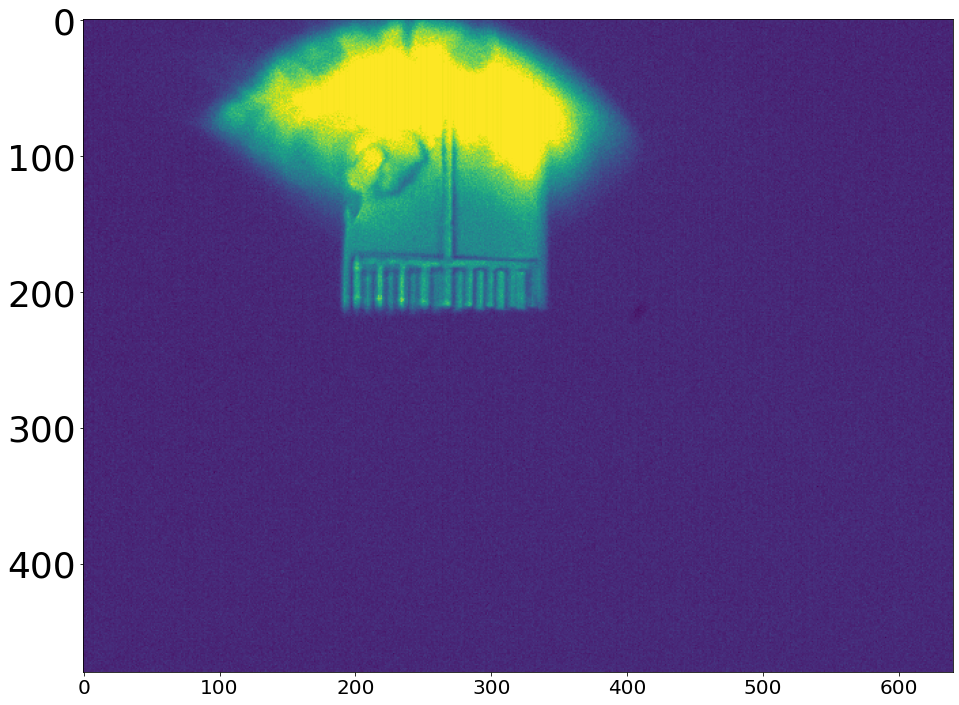

In [52]:
plt.imshow(attr_x_top_zoom_img[7])